Linear Least Squares Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

442 10
(442,)


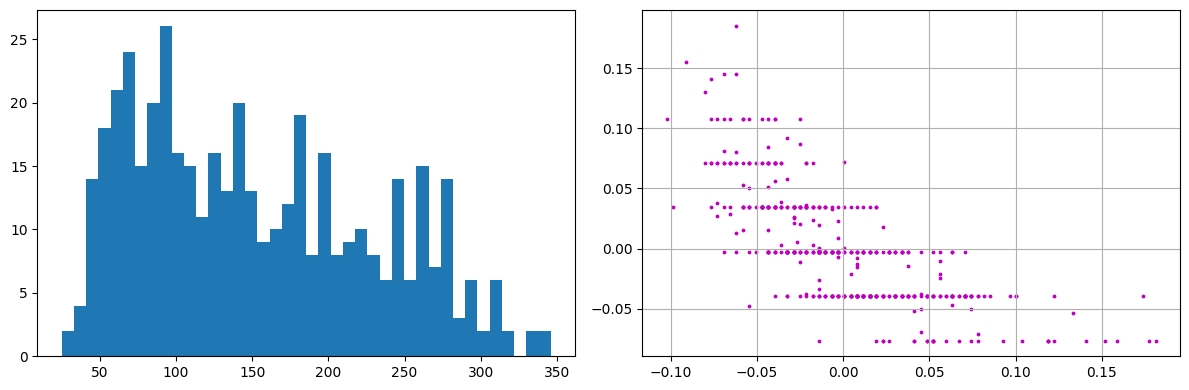

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression

# Load data, inspect and do exploratory plots
#
diabetes = datasets.load_diabetes()
X = diabetes.data
t = diabetes.target
# Inspect sizes
#
NumData, NumFeatures = X.shape
print(NumData, NumFeatures) # 442 X 10
print(t.shape) # 442
# Plot and save
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax[0].hist(t, bins=40)
ax[1].scatter(X[:,6], X[:,7], c='m', s=3) #scatter plot of column 7 and 8 from the features
ax[1].grid(True)
plt.tight_layout()
plt.savefig("DiabetesTargetAndTwoInputs.jpg")


Weights = [ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]


Text(0.5, 1.0, 'pseudo-inverse')

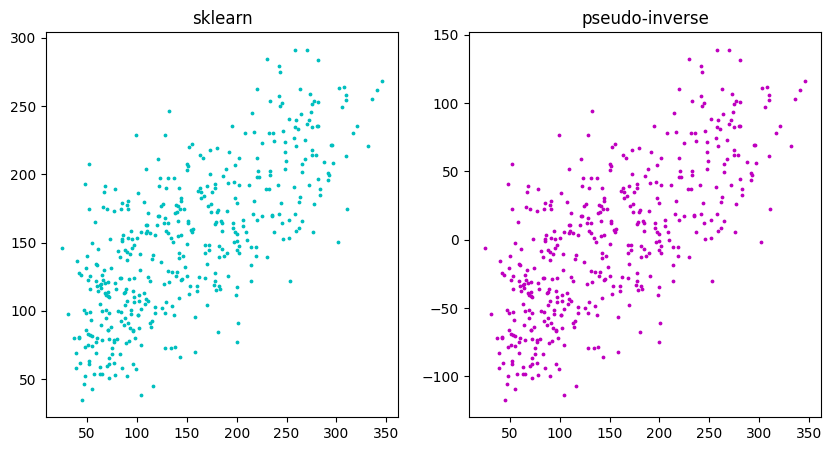

In [ ]:
# Linear regression using sklearn
#
lin = LinearRegression() #initializing a linear regression model from sklearn
lin.fit(X, t) #fitting the linear regression model to the data 'X' and target 't'
th1 = lin.predict(X) #This generates predictions th1 using the fitted model lin on the input data X.

# Pseudo-inverse solution to linear regression
#
w = np.linalg.inv(X.T @ X) @ X.T @ t #calculate the weights using pseudo-inverse methods
print('Weights =', w)

th2 = X @ w

# Plot predictions to check if they look the same!
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(t, th1, c='c', s=3)
ax[0].set_title('sklearn')
ax[1].scatter(t, th2, c='m', s=3)
ax[1].set_title('pseudo-inverse')

Regualrization

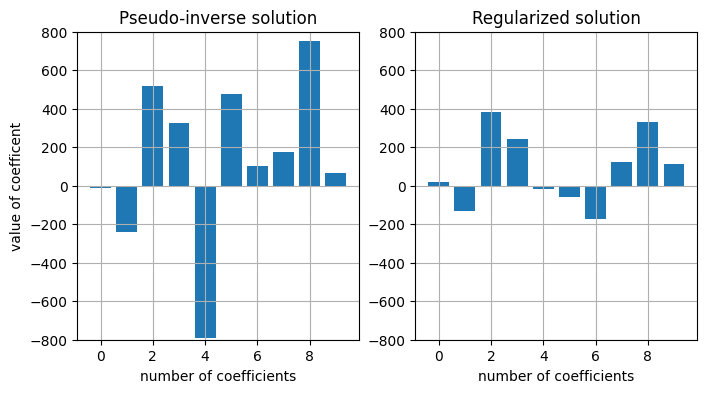

In [ ]:
gamma = 0.5
wR = np.linalg.inv(X.T @ X + gamma*np.identity(NumFeatures)) @ X.T @ t

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

ax[0].bar(np.arange(len(w)), w)
ax[0].set_title("Pseudo-inverse solution")
ax[0].set_ylim(-800, 800)
ax[0].set_xlabel('number of coefficients')
ax[0].set_ylabel('value of coefficent') #check the values of coefficients. You can see that htey are equal to the printed values from the pseudo inverse method from the above section
#the number of coefficients ranges from 0 - 9 because we found out there were 10 features
ax[0].grid(True)

ax[1].bar(np.arange(len(wR)), wR)
ax[1].set_title("Regularized solution")
ax[1].set_ylim(-800, 800)
ax[1].set_xlabel('number of coefficients')
ax[1].grid(True)

plt.savefig("LeastSquaresAndRegularizedWeights.jpg")

3. Sparse Regression

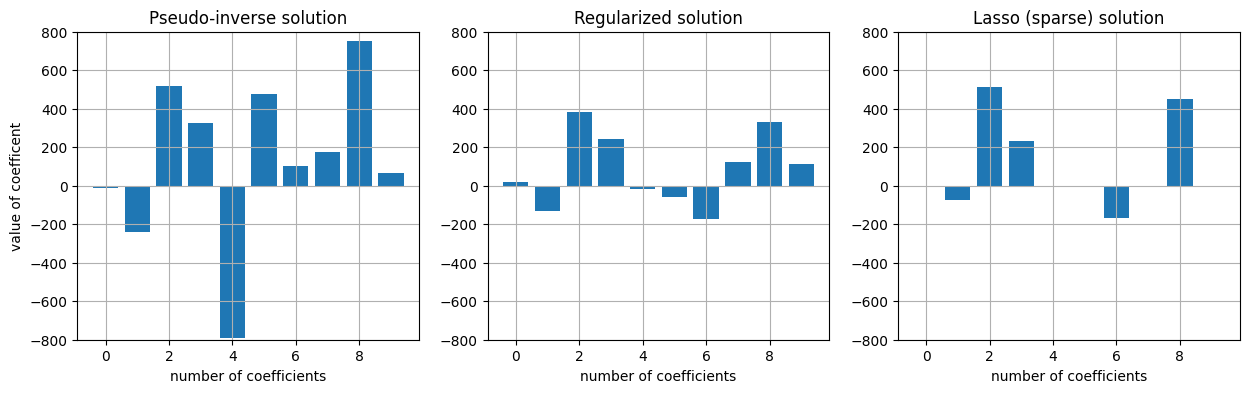

In [ ]:
from sklearn.linear_model import Lasso
ll = Lasso(alpha=0.2)
ll.fit(X, t)
th_lasso = ll.predict(X)

wL = np.linalg.inv(X.T @ X) @ X.T @ th_lasso #calculate the weights using pseudo-inverse methods
#print(th_lasso)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax[0].bar(np.arange(len(w)), w)
ax[0].set_title("Pseudo-inverse solution")
ax[0].set_ylim(-800, 800)
ax[0].set_xlabel('number of coefficients')
ax[0].set_ylabel('value of coefficent')
ax[0].grid(True)

ax[1].bar(np.arange(len(wR)), wR)
ax[1].set_title("Regularized solution")
ax[1].set_ylim(-800, 800)
ax[1].set_xlabel('number of coefficients')
ax[1].grid(True)

ax[2].bar(np.arange(len(wL)), wL)
ax[2].set_title("Lasso (sparse) solution")
ax[2].set_ylim(-800, 800)
ax[2].set_xlabel('number of coefficients')
ax[2].grid(True)

plt.savefig("solutions.png")

In [ ]:
print(w.reshape(1, -1))


[[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
   476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]]


In [ ]:
# modify this to calculate prediction errors in each case // also draw some scatter plots
from sklearn.metrics import mean_squared_error, mean_absolute_error


#for Pseudo - inverse solution
y_pred = np.dot(w.reshape(1, -1), X.T).flatten()
mse1 = mean_squared_error(y_pred, t)
print("MSE for Pseudo-inverse solution:", mse1)

y_pred = np.dot(wR.reshape(1, -1), X.T).flatten()
mse2 = mean_squared_error(y_pred, t)
print("MSE for Regularized solution:", mse2)

y_pred = np.dot(wL.reshape(1, -1), X.T).flatten()
mse3 = mean_squared_error(y_pred, t)
print("MSE for Regularized solution:", mse3)



MSE for Pseudo-inverse solution: 26004.293351128865
MSE for Regularized solution: 26183.658556475835
MSE for Regularized solution: 26139.603492395057


In here we calculated the mean square error for the whole data set. We introduced regularized terms to prevent overfitting by penalizing large coefficients in the weight vector. So, when we consider the whole data set it is obvious that in Regularized versions the MSE is higher compared to non regularized versions. But the regularized version will perform better if we test the model with a seperate test data set.

Regularization Path

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from sklearn import datasets

# Synthetic data:
# Problem taken from Hastie, et al., Statistical Learning with Sparsity
# Z1, Z2 ~ N(0,1)
# Y = 3*Z1 - 1.5*Z2 + 10*N(0,1) Noisy response
# Noisy inputs (the siz are in two groups of three each)
# Xj = Z1 + 0.2*N(0,1) for j = 1,2,3, and
# Xj = Z2 + 0.2*N(0,1) for j = 4,5,6.

N = 100  #to generate data set with 100 samples
y = np.empty(0)
X = np.empty([0,6])

for i in range(N):
    Z1 = np.random.randn() #generate a random number for Z1 and Z2
    Z2 = np.random.randn()
    y  = np.append(y, 3*Z1 - 1.5*Z2 + 2*np.random.randn()) #generate targe value with noise / 2 * np.random.randn() correspons=ds to adding the noise
    Xarr = np.array([Z1,Z1,Z1,Z2,Z2,Z2]) + np.random.randn(6) / 5 #forst 1 elements are Z1 and last 3 elements are Z2. / then add some random noise from a normal distribution scaled by 1/5 to each element
    X = np.vstack((X, Xarr.tolist())) #stack each set of generated values vertically


In [ ]:
print(X)

Text(0, 0.5, 'Regression Coefficients')

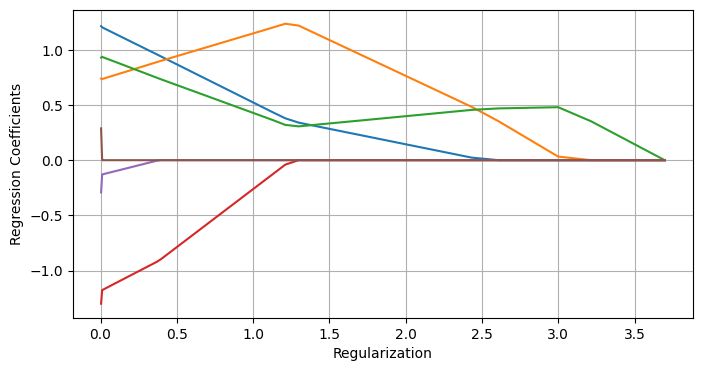

In [ ]:
# Compute regressions with Lasso and return paths
#
alphas_lasso, coefs_lasso, _ = lasso_path(X, y)

# Plot each coefficient
#
fig, ax = plt.subplots(figsize = (8,4))
for i in range(6):
    ax.plot(alphas_lasso, coefs_lasso[i,:])

ax.grid(True)
ax.set_xlabel("Regularization")
ax.set_ylabel("Regression Coefficients")

1. X-axis: Regularization parameter (α): This is the parameter controlling the strength of regularization in the Lasso regression model. It's a logarithmically spaced sequence of regularization values used during the training of the model.
2. Y-axis: Regression coefficients: Each coefficient in the model has its own curve on the plot, illustrating how its value changes as the regularization parameter varies. The y-axis represents the magnitude of the coefficients.
3. Plot lines: Each line on the plot represents the path of a specific coefficient as the regularization parameter increases or decreases. These lines show how the coefficients evolve as the model adjusts to the level of regularization.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

sol = pd.read_excel("/content/Husskonen_Solubility_Features.xlsx", verbose=False)




In [ ]:
print(sol.columns)

Index([                             0,          'Compound_Identifier',
                             'Source',                       'SMILES',
                            'LogS.M.',                           'MW',
                                'AMW',                           'Sv',
                                 'Se',                           'Sp',
       ...
                       'Psychotic-80',                 'Psychotic-50',
                       'Hypertens-80',                 'Hypertens-50',
                        'Hypnotic-80',                  'Hypnotic-50',
                      'Neoplastic-80',                'Neoplastic-50',
                       'Infective-80', 'Infective-50_x000D__x000D_\n'],
      dtype='object', length=2261)


In [ ]:
# Print the values in the column
print(sol["Infective-50_x000D__x000D_\n"])


0      0_x000D__x000D_\n
1      0_x000D__x000D_\n
2      0_x000D__x000D_\n
3      0_x000D__x000D_\n
4      0_x000D__x000D_\n
             ...        
927    0_x000D__x000D_\n
928    0_x000D__x000D_\n
929    0_x000D__x000D_\n
930    0_x000D__x000D_\n
931    0_x000D__x000D_\n
Name: Infective-50_x000D__x000D_\n, Length: 932, dtype: object


In [ ]:
# Remove the extra characters and convert to float
sol["Infective-50_x000D__x000D_\n"] = sol["Infective-50_x000D__x000D_\n"].str.replace("_x000D__x000D_\n", "").astype(float)


In [ ]:
print(sol["Infective-50_x000D__x000D_\n"])

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
927    0.0
928    0.0
929    0.0
930    0.0
931    0.0
Name: Infective-50_x000D__x000D_\n, Length: 932, dtype: float64


sol shape is = (932, 2261)
sol columns are = Index([                             0,          'Compound_Identifier',
                             'Source',                       'SMILES',
                            'LogS.M.',                           'MW',
                                'AMW',                           'Sv',
                                 'Se',                           'Sp',
       ...
                       'Psychotic-80',                 'Psychotic-50',
                       'Hypertens-80',                 'Hypertens-50',
                        'Hypnotic-80',                  'Hypnotic-50',
                      'Neoplastic-80',                'Neoplastic-50',
                       'Infective-80', 'Infective-50_x000D__x000D_\n'],
      dtype='object', length=2261)
X.shape = (932, 2256)
t.shape = (932,)


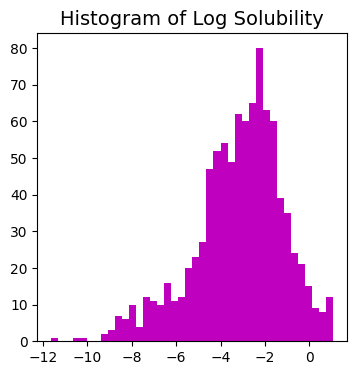

In [ ]:
# Define desired column names (assuming you want features from index 5 onwards)
colnames = list(sol.columns[:])


print(f"sol shape is = {sol.shape}")
print(f"sol columns are = {sol.columns}")

t = sol["LogS.M."].values
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(t, bins=40, facecolor='m')
ax.set_title("Histogram of Log Solubility", fontsize=14)

colnames = sol.columns
#print(colnames)

X = sol[colnames[5:len(colnames)]]

N, p = X.shape
print(f"X.shape = {X.shape}")
print(f"t.shape = {t.shape}")

# Split data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)

Text(0.5, 1.0, 'Test Data')

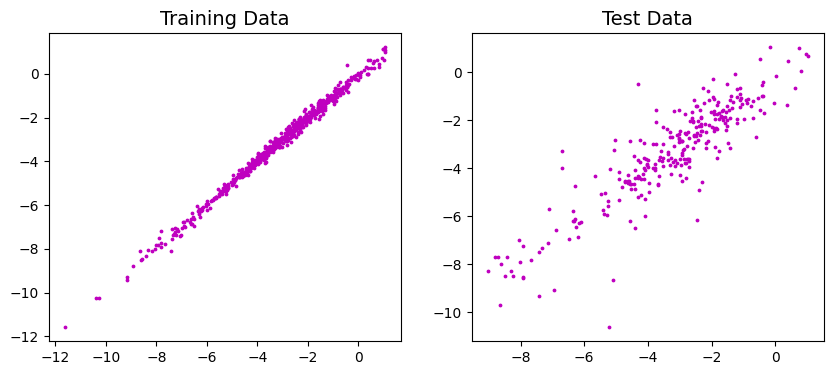

In [ ]:
# Regularized regression
#
gamma = 2.3
w = np.linalg.inv(X_train.T @ X_train + gamma*np.identity(p)) @ X_train.T @ t_train
th_train = X_train @ w.to_numpy()
th_test = X_test @ w.to_numpy()

# Plot training and test predictions
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(t_train, th_train, c='m', s=3)
ax[0].set_title("Training Data", fontsize=14)

ax[1].scatter(t_test, th_test, c='m', s=3)
#ax[1].grid(True)
ax[1].set_title("Test Data", fontsize=14)

In [ ]:
from sklearn.linear_model import Lasso
ll = Lasso(alpha=2.3)
ll.fit(X_train, t_train)
fl_train = ll.predict(X_train)
fl_test = ll.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.433e+02, tolerance: 2.628e-01
  model = cd_fast.enet_coordinate_descent(


In [ ]:


# Plot training and test predictions
#


###############
fig = plt.figure()
plt.title('31240232-Distributions', fontsize=14)
plt.hist(t_test, bins=40, facecolor='k')
plt.hist(th_test, bins=40, facecolor='m')
plt.grid(True)
plt.ylabel('number of coeff')
plt.xlabel('predictions by Ridge')
plt.gca().legend(('target','ridge'))
plt.savefig('6-predictions.png')

fig = plt.figure()
plt.title('31240232-Distributions', fontsize=14)
plt.hist(t_test, bins=40, facecolor='k')
plt.hist(fl_test, bins=40, facecolor='b')
plt.grid(True)
plt.ylabel('number of coeff')
plt.xlabel('predictions by Lasso')
plt.gca().legend(('target','lasso'))
plt.savefig('7-predictions.png')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.437e+02, tolerance: 2.628e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.522e+02, tolerance: 2.628e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.634e+02, tolerance: 2.628e

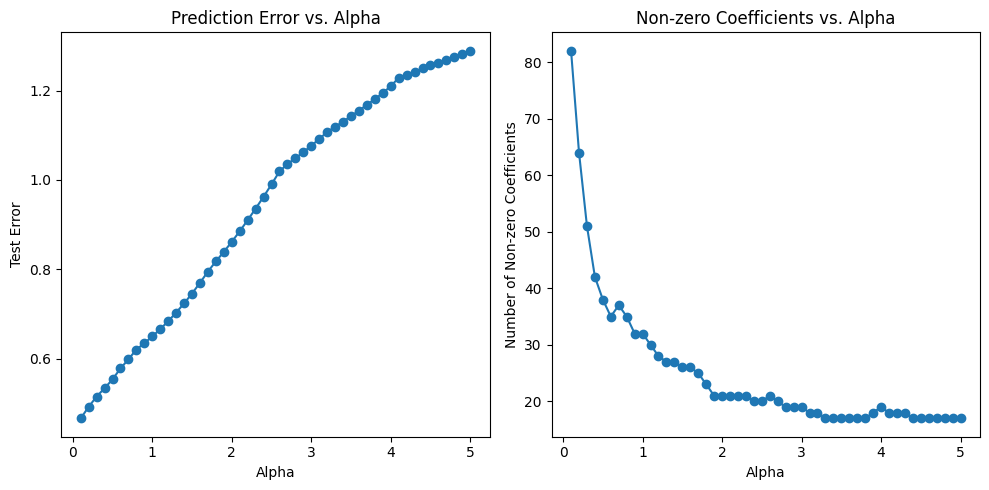

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Define a range of alpha values for regularization
alphas = np.linspace(0.1, 5, 50)

# Initialize lists to store results
test_errors = []
non_zero_coefficients = []

for alpha in alphas:
    # Train Lasso model
    ll = Lasso(alpha=alpha)
    ll.fit(X_train, t_train)

    # Predict on test data
    fl_test = ll.predict(X_test)

    # Calculate prediction error
    test_error = mean_squared_error(t_test, fl_test)
    test_errors.append(test_error)

    # Count non-zero coefficients
    non_zero_coef = np.count_nonzero(ll.coef_)
    non_zero_coefficients.append(non_zero_coef)

# Plot prediction error vs. alpha
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(alphas, test_errors, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Test Error')
plt.title('Prediction Error vs. Alpha')

# Plot number of non-zero coefficients vs. alpha
plt.subplot(1, 2, 2)
plt.plot(alphas, non_zero_coefficients, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Number of Non-zero Coefficients')
plt.title('Non-zero Coefficients vs. Alpha')

plt.tight_layout()
plt.show()

As you can see when you increase the alpha the number of non zero coefficients decreases, which means, more coefficients has become zero. THe reason for that is,
Lasso regression penalizes large coefficients in the model. When you increase lambda, the **penalty becomes stronger**, forcing more coefficients to shrink towards zero. This reduces the overall complexity of the model.

In [ ]:
# choosing the top ten features



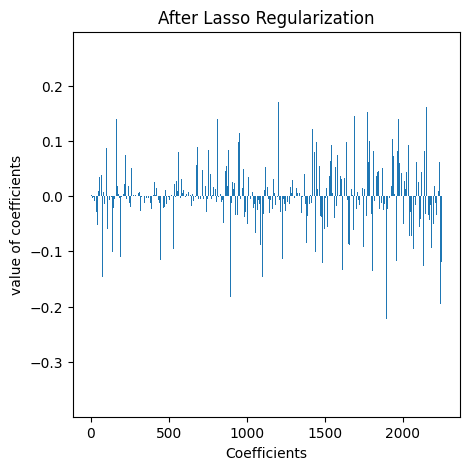

In [ ]:
plt.figure(figsize=(5,5))

plt.bar(np.arange(len(w)), w)

plt.title("After Lasso Regularization")

plt.xlabel("Coefficients")
plt.ylabel("value of coefficients")

plt.show()

In [ ]:
# Check the number of columns
num_columns = sol.shape[1]
print("Number of columns:", num_columns)

Number of columns: 2261


In [ ]:
# Get the indices of the largest 10 values in w
largest_indices = np.argsort(w)[-10:]

# Extract the column names corresponding to the largest values
largest_column_names = X_train.columns[largest_indices]

# Extract the largest values
largest_values = w[largest_indices]

# Print the largest values and their corresponding column names
for col_name, value in zip(largest_column_names, largest_values):
    print(f"Column: {col_name}, Value: {value}")

Column: CATS2D_04_PL, Value: 0.1953970357804043
Column: B10[C-C], Value: 0.20300657681325174
Column: N-068, Value: 0.20924016939586934
Column: B05[O-Cl], Value: 0.21920358638541446
Column: F08[O-O], Value: 0.22925371044315143
Column: F04[O-Cl], Value: 0.23304550543080435
Column: B05[C-N], Value: 0.24368608641705902
Column: CATS2D_06_DP, Value: 0.24511741231759232
Column: SssssC, Value: 0.24741001414461253
Column: MAXDP, Value: 0.26602348998699576


In [ ]:
# Extract the columns from X_train corresponding to the largest indices
X_selected_columns = X_test.iloc[:, largest_indices]

# Print the selected columns
print("Columns corresponding to the largest indices:")
print(X_selected_columns)


Columns corresponding to the largest indices:
     CATS2D_04_PL  B10[C-C]  N-068  B05[O-Cl]  F08[O-O]  F04[O-Cl]  B05[C-N]  \
354             0         0      0          0         0          0         0   
155             0         0      0          0         0          0         1   
279             0         0      0          0         0          0         0   
502             0         0      0          1         0          0         0   
98              0         1      0          0         0          0         1   
..            ...       ...    ...        ...       ...        ...       ...   
927             0         0      1          0         0          0         1   
136             0         0      0          0         0          0         0   
689             0         0      0          0         0          0         0   
97              0         1      0          0         0          0         0   
320             0         0      0          0         0          0        

In [ ]:
# with all of the features

error_all = mean_squared_error(th_test, t_test)
print(error_all)

lasso_pred = X_selected_columns @ largest_values.to_numpy()

error_regularized = mean_squared_error(lasso_pred, t_test)
print(error_regularized)

0.9468459737788958
22.782328662291643


In [ ]:
# Assuming df is your DataFrame and column_name is the name of the column
column_index = sol.columns.get_loc("MLOGP2")
print(column_index)


2222


In [ ]:
print(w[2221])

0.025967458201838173
